## Mini Project III

In [1]:
import pandas as pd

# Data Wrangling

In [29]:
df_list = []
table_name_list = [
    'twm_accounts', 'twm_checking_acct', 'twm_checking_tran', 'twm_credit_acct',
    'twm_credit_tran', 'twm_customer', 'twm_savings_acct', 'twm_savings_tran', 'twm_transactions'
    ]

for i in table_name_list:
    df = pd.read_csv(i+'.csv', sep=';')
    df_list.append(df)

In [30]:
accounts_df = df_list[0]
checking_acct_df = df_list[1]
checking_tran_df = df_list[2]
credit_acct_df = df_list[3]
credit_tran_df = df_list[4]
customer_df = df_list[5]
savings_acct_df = df_list[6]
savings_tran_df = df_list[7]
transactions_df = df_list[8]


# Data Preparation & Feature Engineering

# Accounts

In [31]:
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [46]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [66]:
accounts_df['acct_nbr'].nunique()

1409

In [32]:
checking_acct_df.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [48]:
checking_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [67]:
credit_acct_df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [68]:
credit_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [69]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [70]:
savings_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [33]:
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [84]:
checking_tran_df['tran_time'] = checking_tran_df['tran_time'].str.strip()
checking_tran_df['tran_time'].isnull().sum()

0

In [49]:
checking_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [35]:
credit_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [51]:
credit_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [36]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [45]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [61]:
customer_df['city_name'].nunique()

69

In [62]:
customer_df['state_code'].nunique()

33

In [63]:
customer_df['postal_code'].nunique()

442

C:\Users\User\AppData\Local\Temp\ipykernel_23588\1682001555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customer_df.corr())


<AxesSubplot: >

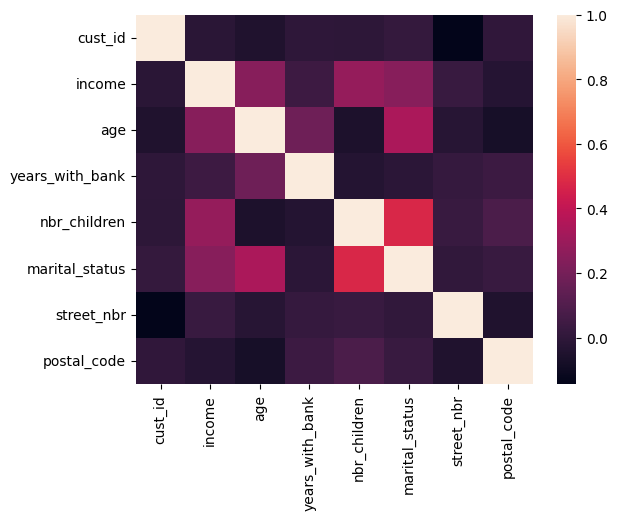

In [65]:
import seaborn as sns
sns.heatmap(customer_df.corr())

In [59]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [57]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [43]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [53]:
savings_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [38]:
savings_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [54]:
savings_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        11189 non-null  int64  
 1   tran_id        11189 non-null  int64  
 2   tran_amt       11189 non-null  float64
 3   principal_amt  11189 non-null  float64
 4   interest_amt   11189 non-null  float64
 5   new_balance    11189 non-null  float64
 6   tran_date      11189 non-null  object 
 7   tran_time      11189 non-null  object 
 8   channel        11189 non-null  object 
 9   tran_code      11189 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 874.3+ KB


In [39]:
transactions_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [55]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


# Data Preparation and Feature Engineering